In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
## Reading the csv file
new=pd.read_csv('Social_Network_Ads.csv')

In [3]:
new.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
## Checking for null values
new.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
new['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
X = new[['Age', 'EstimatedSalary']]
y = new['Purchased']


In [8]:
## Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42, )

In [9]:
## Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [10]:
## Model Fitting
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(penalty='none')
classifier.fit(X_train,y_train)

D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [11]:
y_pred = classifier.predict(X_test)

Text(0.5, 1.0, 'Regression Line Tracing')

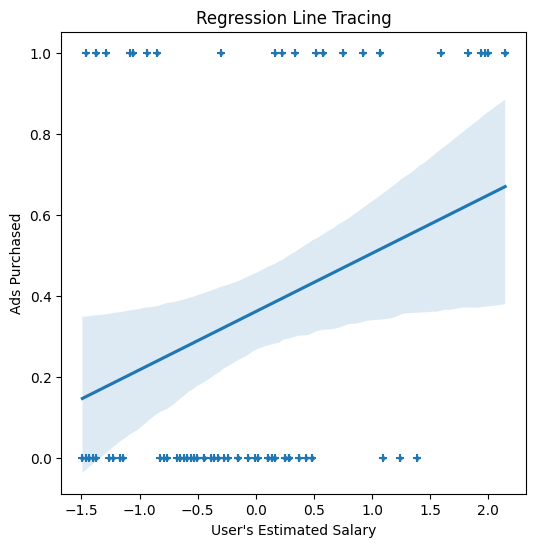

In [12]:
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test[:, 1], y = y_test, scatter_kws={'s':5})
plt.scatter(X_test[:, 1], y_test, marker = '+')
plt.xlabel("User's Estimated Salary")
plt.ylabel('Ads Purchased')
plt.title('Regression Line Tracing')

In [13]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm)   
ac = accuracy_score(y_test, y_pred)*100
print('Accuracy Score:')
print(ac)

Confusion Matrix: 
[[50  2]
 [ 7 21]]
Accuracy Score:
88.75


In [14]:
## True positive, true negative, false positive & false negative
tp=cm[0][0]
tn=cm[1][1]
fp=cm[1][0]
fn=cm[0][1]
total=tp+tn+fp+fn

In [15]:
## Error Rate
error_rate=(fp+fn)/(total)
print('error rate: ')
print(error_rate)

error rate: 
0.1125


In [16]:
## Classification Report
from sklearn.metrics import classification_report
print('                      classification report:')
print(classification_report(y_test,y_pred))

                      classification report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [17]:
new

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<Axes: xlabel='Age', ylabel='Purchased'>

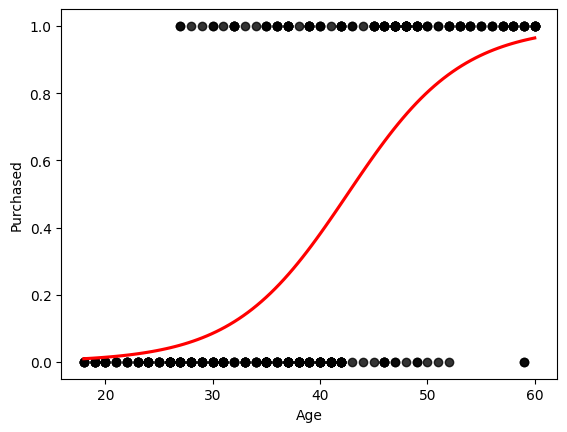

In [18]:
import seaborn as sns
sns.regplot(x=new['Age'], y=y, data=new, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})